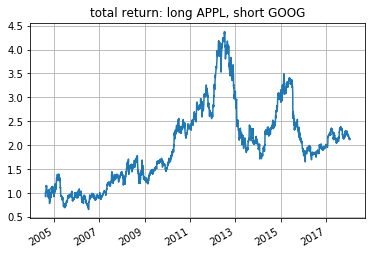

In [2]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from six.moves import urllib

start_date = "2004-8-19"
end_date = '2018-1-20'

# grab the price data off yahoo csv quotes
r1 = pd.read_csv('market_data/yahoofinance-AAPL-20040819-20180120.csv',
                 index_col=0,
                 parse_dates=True,
                 infer_datetime_format=True)
r2 = pd.read_csv('market_data/yahoofinance-GOOG-20040819-20180120.csv',
                 index_col=0,
                 parse_dates=True,
                 infer_datetime_format=True)


# compute the daily returns and add these columns to the arrays
gains1 = np.zeros_like(r1["Adj Close"])
gains2 = np.zeros_like(r2["Adj Close"])
gains1[1:] = np.diff(r1["Adj Close"]) / r1["Adj Close"][:-1]
gains2[1:] = np.diff(r2["Adj Close"]) / r2["Adj Close"][:-1]
r1['gains'] = gains1
r2['gains'] = gains2


# now join them by date
r = pd.merge(r1, r2, left_index=True, right_index=True,
             suffixes=(['1', '2']), sort=True)


# long appl, short goog
g = r.gains1 - r.gains2
tr = (1 + g).cumprod()  # the total return

# plot the return
fig, ax = plt.subplots()
ax.plot(r.index, tr)
ax.set_title('total return: long AAPL, short GOOG')
ax.grid()
fig.autofmt_xdate()
plt.show()